## Généralités sur les séries temporelles

**Définissez une séries temporelles et  son utilité**

```
Une série temporelle, ou série chronologique, est une suite de valeurs numériques représentant l'évolution d'une quantité spécifique au cours du temps. De telles suites de variables aléatoires peuvent être exprimées mathématiquement afin d'en analyser le comportement, généralement pour comprendre son évolution passée et pour en prévoir le comportement futur.
```

_____


**Définissez la bibliothèque "datetime"**

`Le module datetime fournit des classes permettant de manipuler les dates et les heures.`

_______

# Importation et Exploration des données COVID-19

Importons les données depuis le fichier CSV `covid-19-data.csv`

In [1]:
import pandas as pd
import numpy as np

In [2]:
# Importer les données du fichier CSV

df = pd.read_csv('covid-19-data.csv', sep = ';')

In [3]:
# Afficher la structure du dataframe

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38228 entries, 0 to 38227
Data columns (total 12 columns):
 #   Column                                                      Non-Null Count  Dtype  
---  ------                                                      --------------  -----  
 0   dateRep                                                     38228 non-null  object 
 1   day                                                         38228 non-null  int64  
 2   month                                                       38228 non-null  int64  
 3   year                                                        38228 non-null  int64  
 4   cases                                                       38228 non-null  int64  
 5   deaths                                                      38228 non-null  int64  
 6   countriesAndTerritories                                     38228 non-null  object 
 7   geold                                                       38065 non-null  object 
 

In [4]:
# Afficher un apperçu des données 

df.head()

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geold,countryterritoryCode,popData2019,ContinentExp,Cumulative_number_for_14_days_of_COVID-19_cases_per_100000
0,30/06/2020,30,6,2020,271,12,Afghanistan,AF,AFG,38041757.0,Asia,15.012451
1,29/06/2020,29,6,2020,351,18,Afghanistan,AF,AFG,38041757.0,Asia,16.300509
2,28/06/2020,28,6,2020,165,20,Afghanistan,AF,AFG,38041757.0,Asia,17.123289
3,27/06/2020,27,6,2020,276,8,Afghanistan,AF,AFG,38041757.0,Asia,18.151107
4,26/06/2020,26,6,2020,460,36,Afghanistan,AF,AFG,38041757.0,Asia,19.150009


**définissez une liste de colonnes inutiles et qui sont: day, month, year, countryterritoryCode, popData2019, Cumulative_number_for_14_days_of_COVID-19_cases_per_100000**  **(On peut l'appeler 'useless_cols')**

In [5]:
useless_cols = ['day', 'month', 'year', 'countryterritoryCode', 'popData2019', 'Cumulative_number_for_14_days_of_COVID-19_cases_per_100000']

**Supprimer ces colonnes du dataframe et afficher un aperçu**

In [6]:
df.drop(useless_cols, inplace = True, axis  = 1)

df.sample(5)

,dateRep,cases,deaths,countriesAndTerritories,geold,ContinentExp
29396,10/07/2020,16,0,Rwanda,RW,Africa
21856,18/07/2020,18,0,Malaysia,MY,Asia
16869,12/04/2020,330,21,Indonesia,ID,Asia
37539,27/04/2020,0,0,Vietnam,VN,Asia
20143,12/06/2020,2,0,Latvia,LV,Europe


**Quel est le type des données dans la colonne dateRep?** 

In [7]:
print(df['dateRep'].dtypes)

object


**Convertissez les en format date de python et affichez un aperçu**

In [8]:
df['dateRep'] = pd.to_datetime(df['dateRep'])

df['dateRep'].sample(5)

C:\Users\antoine.lecroart\AppData\Local\Temp\ipykernel_2256\3257918430.py:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df['dateRep'] = pd.to_datetime(df['dateRep'])


22560   2020-11-08
14718   2020-06-13
32193   2020-04-21
31551   2020-08-04
2263    2020-07-27
Name: dateRep, dtype: datetime64[ns]

**Affichez les dates les plus anciennes et  les plus récentes**

In [9]:
print(f"Dates les plus anciennes :\n{df['dateRep'].nsmallest(5)}\n")

print(f"Dates les plus récentes :\n{df['dateRep'].nlargest(5)}")

Dates les plus anciennes :
172    2019-12-31
574    2019-12-31
1603   2019-12-31
1996   2019-12-31
2234   2019-12-31
Name: dateRep, dtype: datetime64[ns]

Dates les plus récentes :
185   2020-12-08
354   2020-12-08
587   2020-12-08
751   2020-12-08
907   2020-12-08
Name: dateRep, dtype: datetime64[ns]


**Affichez l'index et expliquez le résulat affiché**

In [10]:
print(f"Indice de la date la plus ancienne : {df['dateRep'].idxmin()}")
print(f"Indice de la date la plus récente : {df['dateRep'].idxmax()}\n")

print("Le dataframe est trié par pays, cela explique l'incohérence de l'indexage.")

Indice de la date la plus ancienne : 172
Indice de la date la plus récente : 185

Le dataframe est trié par pays, cela explique l'incohérence de l'indexage.


**Forcez l'index pour qu'il soit la colonne 'DateRep' et affichez un aperçu**

In [11]:
df = df.set_index('dateRep')
df.sample(5)

,cases,deaths,countriesAndTerritories,geold,ContinentExp
dateRep,,,,,
2020-03-05,0,0,Guinea_Bissau,GW,Africa
2020-04-28,38,1,Sudan,SD,Africa
2020-06-20,17,1,Mali,ML,Africa
2020-01-07,4,0,Trinidad_and_Tobago,TT,America
2020-07-05,12,0,Albania,AL,Europe


**Affichez les dates par ordre croissant**

In [12]:
df = df.sort_index()
df.head()

,cases,deaths,countriesAndTerritories,geold,ContinentExp
dateRep,,,,,
2019-12-31,0,0,Norway,NO,Europe
2019-12-31,0,0,Nepal,NP,Asia
2019-12-31,0,0,United_Arab_Emirates,AE,Asia
2019-12-31,0,0,Taiwan,TW,Asia
2019-12-31,0,0,Austria,AT,Europe


## Extraction des données d’un pays

**Afficher la liste des pays dans la jeu de données**

In [13]:
df['countriesAndTerritories'].unique()

array(['Norway', 'Nepal', 'United_Arab_Emirates', 'Taiwan', 'Austria',
       'Canada', 'China', 'Brazil', 'Kuwait', 'Bahrain', 'Malaysia',
       'Belgium', 'Switzerland',
       'Cases_on_an_international_conveyance_Japan',
       'United_States_of_America', 'Australia', 'Monaco', 'Philippines',
       'Belarus', 'Estonia', 'Japan', 'Romania', 'North_Macedonia',
       'Denmark', 'France', 'Russia', 'Ireland', 'Iran', 'United_Kingdom',
       'Iraq', 'Azerbaijan', 'Greece', 'India', 'Egypt', 'Vietnam',
       'Nigeria', 'Mexico', 'Spain', 'Ecuador', 'Afghanistan',
       'Lithuania', 'Lebanon', 'New_Zealand', 'Israel', 'Sri_Lanka',
       'South_Korea', 'Armenia', 'Georgia', 'Czechia', 'Indonesia',
       'Sweden', 'Dominican_Republic', 'Croatia', 'Qatar', 'Iceland',
       'Germany', 'Finland', 'San_Marino', 'Singapore', 'Cambodia',
       'Algeria', 'Thailand', 'Netherlands', 'Oman', 'Pakistan',
       'Luxembourg', 'Italy', 'Palestine', 'Paraguay', 'Bolivia',
       'Jersey', 'Cyp

**Extraire uniquement les données de la Chine et affichez un aperçu**

In [14]:
df_china = df[df['countriesAndTerritories'] == 'China']

df_china.sample(5)

,cases,deaths,countriesAndTerritories,geold,ContinentExp
dateRep,,,,,
2020-12-06,7,0,China,CN,Asia
2020-09-05,0,0,China,CN,Asia
2020-07-22,74,2,China,CN,Asia
2020-06-20,30,0,China,CN,Asia
2020-04-18,31,0,China,CN,Asia


**Comme on sait maintenant que les données qu'on a sont celles de la Chine, on veut supprimer les colonnes indiquant le territoire, la geoIs et le continent**

In [15]:
df_china.drop(['countriesAndTerritories', 'geold', 'ContinentExp'], axis = 1, inplace = True)
df_china.sample(5)

C:\Users\antoine.lecroart\AppData\Local\Temp\ipykernel_2256\1926553144.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_china.drop(['countriesAndTerritories', 'geold', 'ContinentExp'], axis = 1, inplace = True)


,cases,deaths
dateRep,,
2020-06-08,122,1
2020-04-07,9,0
2020-05-30,17,0
2020-07-17,77,0
2020-07-29,207,1


**Afficher un aperçu et les dimensions du dataframe (Combien on a de lignes ? combien de colonnes?)**

In [16]:
print(f"Le dataframe a {df_china.shape[0]} lignes et {df_china.shape[1]} colonnes")

Le dataframe a 238 lignes et 2 colonnes


## Filtrage des Séries Temporelles

**Afichez le nombre des cas, et des décées en Chine en 2019**

In [17]:
df_china.loc['2019']

,cases,deaths
dateRep,,
2019-12-31,27,0


**Afichez le nombre des cas, et des décées en Chine en janvier 2020**

In [18]:
df_china.loc['2020-01']

,cases,deaths
dateRep,,
2020-01-01,0,0
2020-01-02,2095,46
2020-01-03,574,35
2020-01-04,54,1
2020-01-05,12,0
2020-01-06,19,0
2020-01-07,5,0
2020-01-08,166,2
2020-01-13,0,0


**Afichez le nombre des cas, et des décées en Chine le 3 janvier 2020**

In [19]:
df_china.loc['2020-01-03']

cases     574
deaths     35
Name: 2020-01-03 00:00:00, dtype: int64

**Afichez le nombre des cas, et des décées en Chine entre janvier et mars 2020**

In [20]:
df_china.loc['2020-01' : '2020-03']

,cases,deaths
dateRep,,
2020-01-01,0,0
2020-01-02,2095,46
2020-01-03,574,35
2020-01-04,54,1
2020-01-05,12,0
...,...,...
2020-03-27,94,5
2020-03-28,119,3
2020-03-29,113,5


### Échantillonnages et Agrégations

**Définissez ces deux termes**

`Echantillonnage : L'échantillonnage est la sélection d'une partie dans un tout qui produit une série d'échantillons à étudier. Le terme prend un sens précis dans certaines spécialités scientifiques et techniques.`

`Agrégation :  Action d'agréger, de réunir des éléments distincts pour former un tout homogène.`

**Échantillonnez des données de la chine en heure et interprétez le résultats trouvé**

In [21]:
df_china.asfreq('H')

,cases,deaths
dateRep,,
2019-12-31 00:00:00,27.0,0.0
2019-12-31 01:00:00,NaN,NaN
2019-12-31 02:00:00,NaN,NaN
2019-12-31 03:00:00,NaN,NaN
2019-12-31 04:00:00,NaN,NaN
...,...,...
2020-12-07 20:00:00,NaN,NaN
2020-12-07 21:00:00,NaN,NaN
2020-12-07 22:00:00,NaN,NaN


**Quelle méthode nous permet de remplacer les valeurs manquantes par la première valeurs ? Appliquer cette méthode sur nos données de Chine** 

In [22]:
df_china.asfreq('H').fillna(method = 'ffill')

,cases,deaths
dateRep,,
2019-12-31 00:00:00,27.0,0.0
2019-12-31 01:00:00,27.0,0.0
2019-12-31 02:00:00,27.0,0.0
2019-12-31 03:00:00,27.0,0.0
2019-12-31 04:00:00,27.0,0.0
...,...,...
2020-12-07 20:00:00,35.0,0.0
2020-12-07 21:00:00,35.0,0.0
2020-12-07 22:00:00,35.0,0.0


**Quelle méthode nous permet de remplacer les valeurs manquantes par la dernière valeurs ? Appliquer cette méthode sur nos données de Chine** 

In [23]:
df_china.asfreq('H').fillna(method = 'bfill')

,cases,deaths
dateRep,,
2019-12-31 00:00:00,27.0,0.0
2019-12-31 01:00:00,0.0,0.0
2019-12-31 02:00:00,0.0,0.0
2019-12-31 03:00:00,0.0,0.0
2019-12-31 04:00:00,0.0,0.0
...,...,...
2020-12-07 20:00:00,58.0,3.0
2020-12-07 21:00:00,58.0,3.0
2020-12-07 22:00:00,58.0,3.0


**Quelle méthode nous permet de remplacer les valeurs manquantes par une valeure précise ? Appliquer cette méthode sur nos données de Chine en imposant la valeur nulle** 

In [24]:
df_china.asfreq('H').fillna(method = 'pad')

,cases,deaths
dateRep,,
2019-12-31 00:00:00,27.0,0.0
2019-12-31 01:00:00,27.0,0.0
2019-12-31 02:00:00,27.0,0.0
2019-12-31 03:00:00,27.0,0.0
2019-12-31 04:00:00,27.0,0.0
...,...,...
2020-12-07 20:00:00,35.0,0.0
2020-12-07 21:00:00,35.0,0.0
2020-12-07 22:00:00,35.0,0.0


**Ré-echantillonner les données par mois en faisant la somme et afficher les 10 premières lignes**

In [25]:
df_china.asfreq('M').head(10)

,cases,deaths
dateRep,,
2019-12-31,27.0,0.0
2020-01-31,1980.0,43.0
2020-02-29,428.0,47.0
2020-03-31,84.0,3.0
2020-04-30,4.0,0.0
2020-05-31,5.0,0.0
2020-06-30,23.0,0.0
2020-07-31,276.0,0.0
2020-08-31,NaN,NaN


**Ré-echantillonner les données par trimèstre en faisant la somme et la standardisation**

In [26]:
df_china.asfreq('3M')

,cases,deaths
dateRep,,
2019-12-31,27.0,0.0
2020-03-31,84.0,3.0
2020-06-30,23.0,0.0
2020-09-30,NaN,NaN


**Ecrire un script permettant de visualiser (Dans un même graphe) la progression du nombre de cas du mois de janvier par jour et par semaine**

Précisez le style de la ligne et des marques que vous avez utilisez ainsi que leurs épaisseurs. N'oubliez pas aussi la légende

Text(0, 0.5, 'Nombre de cas')

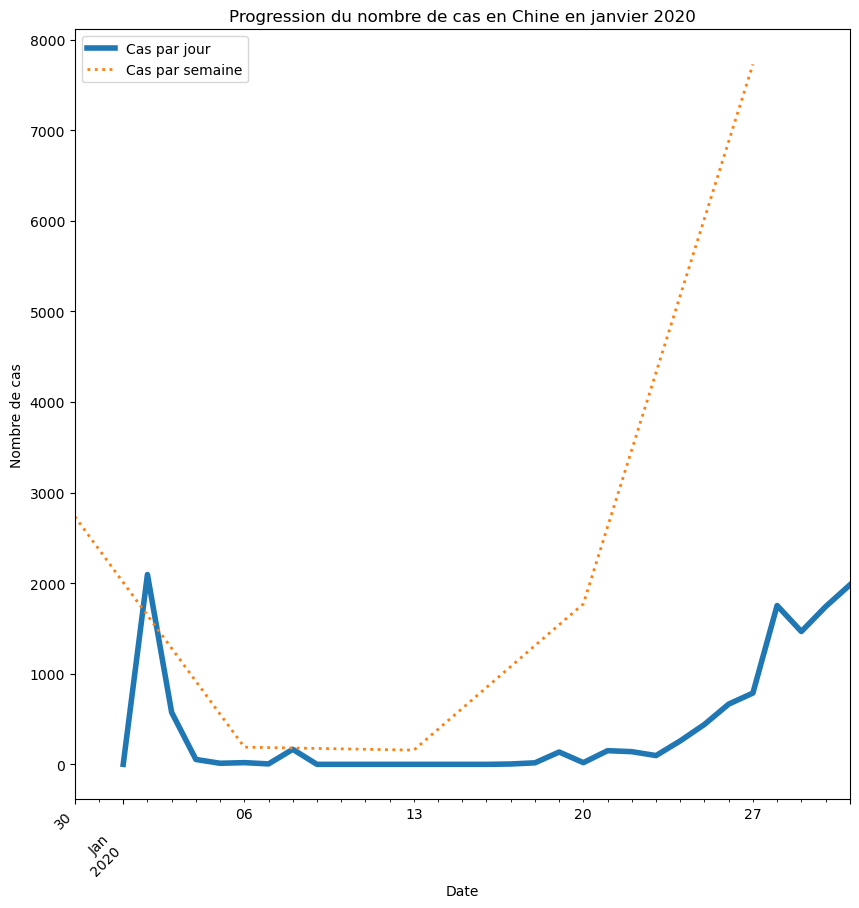

In [27]:
import matplotlib.pyplot as plt

plt.figure(figsize = (10, 10))


df_china.loc['2020-01']['cases'].resample('D').sum().plot.line(linewidth = '4', label = 'Cas par jour')
df_china.loc['2020-01']['cases'].resample('W').sum().plot.line(linewidth = '2', linestyle = 'dotted', label = 'Cas par semaine')

plt.xticks(rotation = 45, ha = 'right')
plt.legend()
plt.title('Progression du nombre de cas en Chine en janvier 2020')
plt.xlabel('Date')
plt.ylabel('Nombre de cas')


## Comparaison des Séries Temporelles

**Quelle méthode de pandas permet de déterminer un écart entre x jours**

`La méthode .shift() permet de déterminer un écart entre x jours`


**Ajouter une colonne "s_cases" présentant le nombre des cas covid du jour précédant, et une autre colonne "s_deaths" présentant le nombre de décées de la veille**

In [28]:
df_china['s_cases'] = df_china['cases'].shift(1)

C:\Users\antoine.lecroart\AppData\Local\Temp\ipykernel_2256\1300686731.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_china['s_cases'] = df_china['cases'].shift(1)


In [29]:
df_china['s_deaths'] = df_china['deaths'].shift(1)

C:\Users\antoine.lecroart\AppData\Local\Temp\ipykernel_2256\3830387579.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_china['s_deaths'] = df_china['deaths'].shift(1)


**Ajoutez maintenant une colonne "l_cases" présentant le nombre des cas covid du jour suivant, et une autre colonne "l_deaths" présentant le nombre de décées du lendemain**

In [30]:
df_china['l_cases'] = df_china['cases'].shift(-1)

C:\Users\antoine.lecroart\AppData\Local\Temp\ipykernel_2256\1587252353.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_china['l_cases'] = df_china['cases'].shift(-1)


**Affichez un apperçu des dernières lignes**

In [31]:
df_china['l_deaths'] = df_china['deaths'].shift(-1)

C:\Users\antoine.lecroart\AppData\Local\Temp\ipykernel_2256\703570390.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_china['l_deaths'] = df_china['deaths'].shift(-1)


**Quelle méthode de pandas permet de déterminer une différence entre x jours ?**

`La méthode .diff() permet de déterminer une différence entre x jours`

**Maintenant on aura plus besoin des derniers 4 colonnes rajoutés** 

**Supprimez les et rajoutez ensuite deux autres colonnes permettant de calculer la différence du nombre de cas et du nombre de décés (on pourra les nommer d_cases & d_deaths)** 

In [32]:
df_china.drop(['s_cases', 's_deaths', 'l_cases', 'l_deaths'], inplace = True, axis = 1)

C:\Users\antoine.lecroart\AppData\Local\Temp\ipykernel_2256\3215830590.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_china.drop(['s_cases', 's_deaths', 'l_cases', 'l_deaths'], inplace = True, axis = 1)


In [33]:
print(df_china)

            cases  deaths
dateRep                  
2019-12-31     27       0
2020-01-01      0       0
2020-01-02   2095      46
2020-01-03    574      35
2020-01-04     54       1
...           ...     ...
2020-12-04     93       0
2020-12-05      1       0
2020-12-06      7       0
2020-12-07     35       0
2020-12-08     58       3

[238 rows x 2 columns]


In [34]:
df_china['d_cases'] = df_china['cases'].diff()

C:\Users\antoine.lecroart\AppData\Local\Temp\ipykernel_2256\2449720482.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_china['d_cases'] = df_china['cases'].diff()


In [35]:
df_china['d_deaths'] = df_china['deaths'].diff()

C:\Users\antoine.lecroart\AppData\Local\Temp\ipykernel_2256\2697570818.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_china['d_deaths'] = df_china['deaths'].diff()


**Quelle méthode de pandas permet de déterminer le pourcentage de progression entre x jours ?**

`La méthode .pct_change() permet de déterminer le pourcentage de progression entre x jours`

**Maintenant on aura plus besoin des colonnes  d_cases & d_deaths, supprimez les** 

In [36]:
df_china 

,cases,deaths,d_cases,d_deaths
dateRep,,,,
2019-12-31,27,0,NaN,NaN
2020-01-01,0,0,-27.0,0.0
2020-01-02,2095,46,2095.0,46.0
2020-01-03,574,35,-1521.0,-11.0
2020-01-04,54,1,-520.0,-34.0
...,...,...,...,...
2020-12-04,93,0,69.0,-11.0
2020-12-05,1,0,-92.0,0.0
2020-12-06,7,0,6.0,0.0


In [37]:
df_china.drop(['d_deaths', 'd_cases'], axis = 1, inplace = True)

C:\Users\antoine.lecroart\AppData\Local\Temp\ipykernel_2256\430999454.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_china.drop(['d_deaths', 'd_cases'], axis = 1, inplace = True)


**Rajoutez deux colonnes des pourcentages d'évolution journalière des cas  covid et des décées et Affichez un aperçu**  

In [38]:
df_china['pct_cases'] = df_china['cases'].pct_change().mul(100)

C:\Users\antoine.lecroart\AppData\Local\Temp\ipykernel_2256\719163370.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_china['pct_cases'] = df_china['cases'].pct_change().mul(100)


In [39]:
df_china['pct_deaths'] = df_china['deaths'].pct_change().mul(100)

C:\Users\antoine.lecroart\AppData\Local\Temp\ipykernel_2256\2216444355.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_china['pct_deaths'] = df_china['deaths'].pct_change().mul(100)


**Interprétez le résultat**

`D'un jour à l'autre, ca varie beaucoup`

**Supprimez les deux dernières colonnes, on en aura plus besoin**

In [40]:
df_china.drop(['pct_deaths', 'pct_cases'], axis = 1, inplace = True)

C:\Users\antoine.lecroart\AppData\Local\Temp\ipykernel_2256\1504018492.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_china.drop(['pct_deaths', 'pct_cases'], axis = 1, inplace = True)


**Déterminer deux nouvelles colonnes avec  la progression cumulée du nombre de cas et de décés - Afficher un aperçu des 20 premières lignes** 

In [41]:
df_china['cum_cases'] = df_china['cases'].cumsum()

C:\Users\antoine.lecroart\AppData\Local\Temp\ipykernel_2256\2814198479.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_china['cum_cases'] = df_china['cases'].cumsum()


In [42]:
df_china['cum_deaths'] = df_china['deaths'].cumsum()

C:\Users\antoine.lecroart\AppData\Local\Temp\ipykernel_2256\1284672884.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_china['cum_deaths'] = df_china['deaths'].cumsum()


In [43]:
df_china

,cases,deaths,cum_cases,cum_deaths
dateRep,,,,
2019-12-31,27,0,27,0
2020-01-01,0,0,27,0
2020-01-02,2095,46,2122,46
2020-01-03,574,35,2696,81
2020-01-04,54,1,2750,82
...,...,...,...,...
2020-12-04,93,0,89594,4708
2020-12-05,1,0,89595,4708
2020-12-06,7,0,89602,4708


**Visualisez la progression cumulée du nombre de cas et de décés dans un même graphe nommé "China Cumulative cases and deaths"**

Text(0, 0.5, 'Nombre de cas')

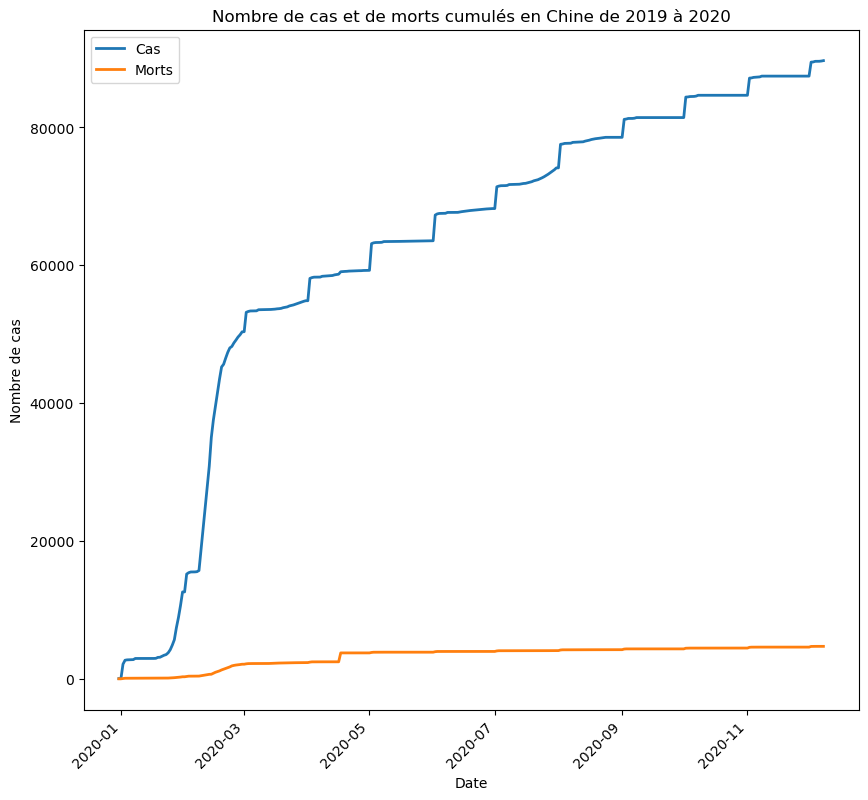

In [44]:
plt.figure(figsize = (10, 10))

df_china['cum_cases'].plot.line(linewidth = '2', label = 'Cas')
df_china['cum_deaths'].plot.line(linewidth = '2', label = 'Morts')

plt.xticks(rotation = 45, ha = 'right')
plt.legend()
plt.title('Nombre de cas et de morts cumulés en Chine de 2019 à 2020')
plt.xlabel('Date')
plt.ylabel('Nombre de cas')

### Généralisation et visualisation

**Maintenant, nous allons écrire deux fonctions: la première fonction appelée "extraction" permet de selectionner un pays, enlever les colonnes dont on a pas besoin, et nettoyer les données).  La deuxième fonction appelée "plot_evalution" permet d'afficher l'evolution cumulée d'au pays**

In [45]:
def extraction(df, country):
    df = df.drop([
        'day', 
        'month', 
        'year', 
        'countryterritoryCode', 
        'popData2019', 
        'Cumulative_number_for_14_days_of_COVID-19_cases_per_100000'], 
        axis  = 1)
    
    df['dateRep'] = pd.to_datetime(df['dateRep'])
    df = df.set_index('dateRep').sort_index()
    df = df[df['countriesAndTerritories'] == country]

    df = df.drop([
        'countriesAndTerritories', 
        'geold', 
        'ContinentExp'], 
        axis = 1)
    
    return(df)

def plot_evaluation(df):
    plt.figure(figsize = (10, 10))

    df['cases'].cumsum().plot.line(linewidth = '2', label = 'Cas')
    df['deaths'].cumsum().plot.line(linewidth = '2', label = 'Morts')

    plt.xticks(rotation = 45, ha = 'right')
    plt.legend()
    plt.title('Nombre de cas et de morts cumulés de 2019 à 2020')
    plt.xlabel('Date')
    plt.ylabel('Nombre de cas')

**Testez ces deux fonctions sur les données de l'Italie**

In [46]:
raw_df = pd.read_csv('covid-19-data.csv', sep = ';')

In [47]:
df = extraction(raw_df, 'Italy')
df

C:\Users\antoine.lecroart\AppData\Local\Temp\ipykernel_2256\3562226856.py:11: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df['dateRep'] = pd.to_datetime(df['dateRep'])


,cases,deaths
dateRep,,
2019-12-31,0,0
2020-01-01,0,0
2020-01-02,0,0
2020-01-03,240,8
2020-01-04,4053,839
...,...,...
2020-12-04,4694,619
2020-12-05,744,179
2020-12-06,379,53


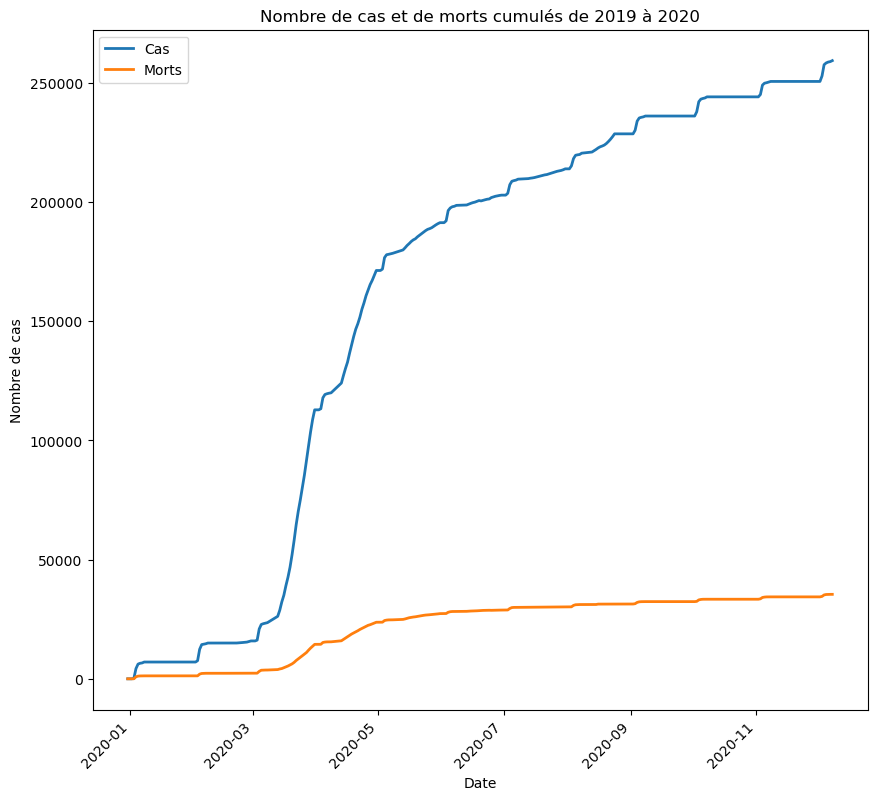

In [48]:
plot_evaluation(df)

### Exercice : 
Affiche l'évolution des cas dans un autre pays de ton choix, NB: les noms de pays sont en anglais

C:\Users\antoine.lecroart\AppData\Local\Temp\ipykernel_2256\3562226856.py:11: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df['dateRep'] = pd.to_datetime(df['dateRep'])


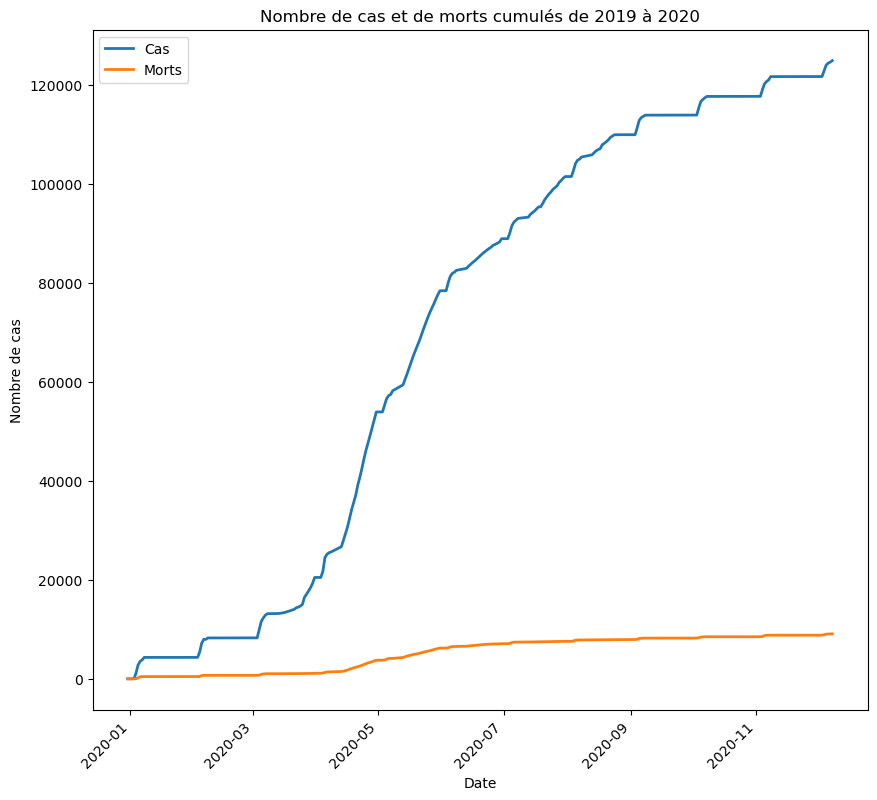

In [49]:
plot_evaluation(extraction(raw_df, 'Canada'))

C:\Users\antoine.lecroart\AppData\Local\Temp\ipykernel_2256\3562226856.py:11: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df['dateRep'] = pd.to_datetime(df['dateRep'])


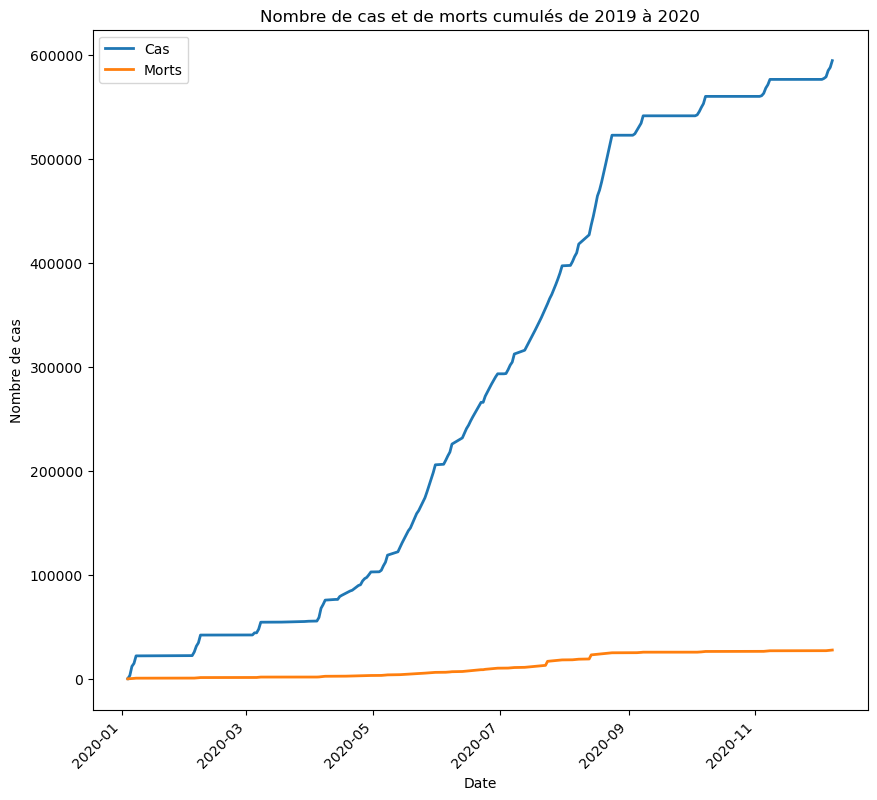

In [50]:
plot_evaluation(extraction(raw_df, 'Peru'))

C:\Users\antoine.lecroart\AppData\Local\Temp\ipykernel_2256\3562226856.py:11: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df['dateRep'] = pd.to_datetime(df['dateRep'])


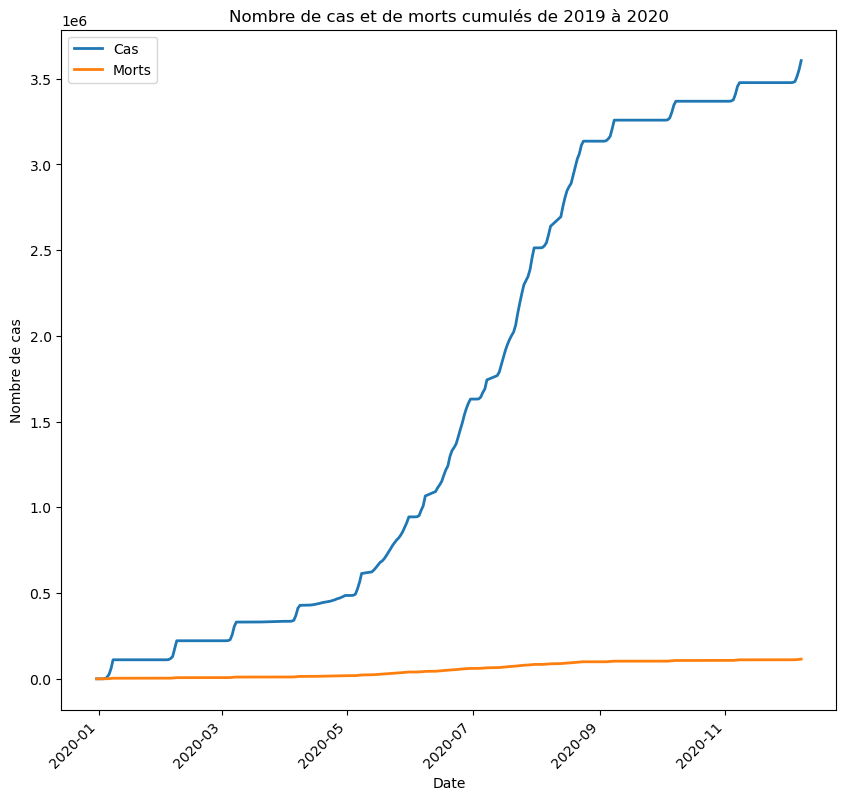

In [51]:
plot_evaluation(extraction(raw_df, 'Brazil'))